In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import pickle
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters

In [2]:
DFs=pickle.load(open('DFs.pkl', 'rb'))
Summaries=pickle.load(open('Summaries.pkl', 'rb'))
print(len(DFs),len(Summaries))

49 49


In [3]:
# Plot activities with HIGHEST attribute

# argpartition is used to collect the right indices, see:
#https://stackoverflow.com/questions/6910641/how-do-i-get-indices-of-n-maximum-values-in-a-numpy-array

attribute='peakZone' # 'meanBPM'
nPlots=5

y=[d[attribute] for d in Summaries]
y=np.array(y)
#print(np.sort(y))

toPlot=np.argpartition(y, -nPlots)[-nPlots:]
#print('\n',toPlot,'\n',y[toPlot],'\n',np.sort(y[toPlot]))

#plotHeartRate(toPlot,DFs,Summaries)

In [4]:
from scipy import fftpack

In [5]:
index=toPlot[3]
print(Summaries[index],len(DFs[index]) )

{'string': '2020-08-06 0:53:38 123.0', 'date': datetime.date(2020, 8, 6), 'meanBPM': 123.0, 'maxBPM': 146, 'duration': datetime.timedelta(seconds=3218), 'peakZone': 228, 'fileName': 'DATA\\heart_rate-2020-08-06.json'} 1415


length  1000 t  0 5 ... 4990 4995
x  99 100 ... 118 119


(-0.01, 0.01)

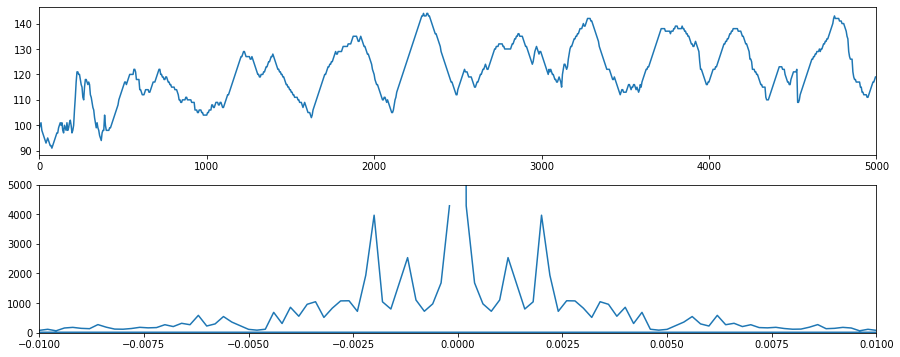

In [6]:
df=DFs[index]
df=df[:1000]
length=len(df)
t = np.arange(start=0, stop=5*length, step=5)
print( 'length ',length,'t ',t[0],t[1],'...',t[-2],t[-1] )
x = df['BPM'] 
print('x ',x[0],x[1],'...',x[length-2],x[length-1])

X = fftpack.fft(x)
frequencies=fftpack.fftfreq(n=length,d=5)  # Sample spacing of 5 seconds

figure, (ax0, ax1) = plt.subplots(2, 1, figsize=(15, 6))
ax0.plot(t,x)
ax0.set_xlim(0,5000)
ax1.plot(frequencies, np.abs(X))
ax1.set_ylim(0, 5000)
ax1.set_xlim(-0.01, +0.01)

In [7]:
nFrequencies=5
values=np.abs(X)
topFrequencies=np.argpartition(values, -nFrequencies)[-nFrequencies:]
print('\n',frequencies[topFrequencies],'\n',values[topFrequencies].round(2))


 [ 0.002  -0.002  -0.0002  0.0002  0.    ] 
 [  3966.03   3966.03   4284.78   4284.78 121062.  ]


In [8]:
print(1/0.004,1/0.0002)

250.0 5000.0


(-0.005, 0.005)

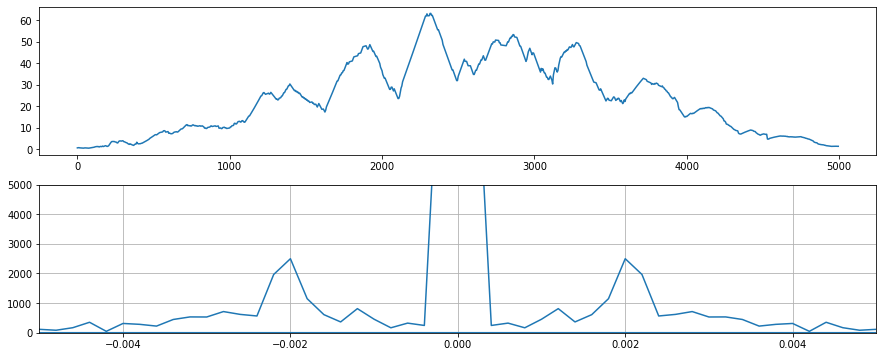

In [9]:
# Kaiser windwoing

win = np.kaiser(len(t), 5)
x_win=(x-80) * win          # Smoothing by Kaiser window (beta=10) and removing the DC (80)
X_win = fftpack.fft( x_win)

frequencies=fftpack.fftfreq(n=length,d=5)  # Sample spacing of 5 seconds

figure, (ax0, ax1) = plt.subplots(2, 1, figsize=(15, 6))
ax0.plot(t,x_win)
ax1.plot(frequencies, np.abs(X_win))
ax1.set_ylim(0, 5000)
ax1.grid(True)
ax1.set_xlim(-0.005, +0.005)

In [10]:
nFrequencies=7
values=np.abs(X_win)
topFrequencies=np.argpartition(values, -nFrequencies)[-nFrequencies:]
print('\n',frequencies[topFrequencies],'\n',values[topFrequencies].round(2))


 [-0.0022  0.002  -0.002   0.0022 -0.0002  0.0002  0.    ] 
 [ 1966.75  2498.69  2498.69  1966.75 10927.7  10927.7  23671.14]


In [11]:
1/0.002

500.0

In [12]:
from scipy import signal

(peaks,properties)=signal.find_peaks(x,height=110,distance=10)
#print(properties)

(90, 150)

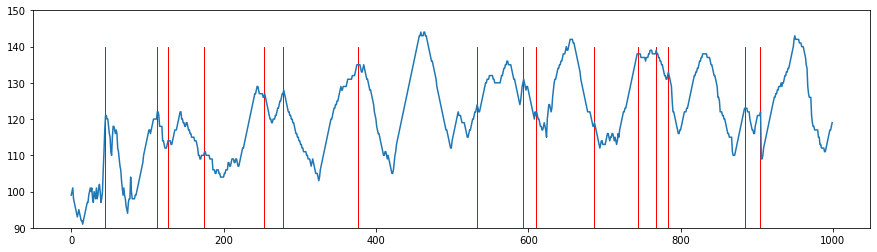

In [13]:
figure, (ax0) = plt.subplots(1, 1, figsize=(15, 4))
ax0.plot(x)
ones=np.ones(len(peaks))*140
ax0.bar(peaks,ones, color='red')
ax0.set_ylim(90, 150)

20.0


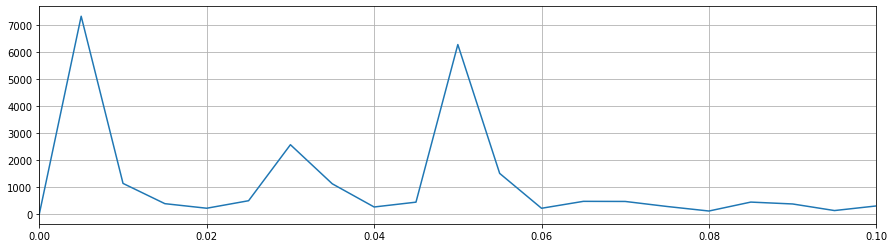

In [29]:
(period,power)=signal.periodogram(x,fs=5.0)

figure, ax0 = plt.subplots(1, 1, figsize=(15, 4))
ax0.plot(period,power)
ax0.set_xlim(0, 0.1)
ax0.grid(True)
print(1/0.05)

# Original Code

In [ ]:
#https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html

from scipy import fftpack

t = np.linspace(0, 1, 500)
x = np.sin(49 * np.pi * t)

X = fftpack.fft(x)

f, (ax0, ax1) = plt.subplots(2, 1)

ax0.plot(x)
ax0.set_ylim(-1.1, 1.1)

ax1.plot(fftpack.fftfreq(len(t)), np.abs(X))
ax1.set_ylim(0, 190)